# **Projek Machine Learning (Clustering)**

Nama : Fadhlurrahman Akbar Nasution

NIM  : 1301194258

Kelas : IF-43-09

## **Impoart Libarry Yang Digunakan**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import random

## **Memasukan dataset yang akan digunakan**

In [2]:
df_train = pd.read_csv('Data/kendaraan_train_pca_clean.csv')
df_train

,Component_1,Component_2
0,-2.184836,0.329283
1,2.917861,0.161468
2,-2.089879,0.416098
3,2.702796,0.017162
4,-2.287977,0.263063
...,...,...
230562,-2.547640,0.081705
230563,-2.045069,0.446805
230564,-1.860918,0.611804
230565,0.318384,2.022060


In [3]:
df_train.dtypes

Component_1    float64
Component_2    float64
dtype: object

In [4]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(df_train))

Total Data : 230567


## **Clustering**

In [5]:
#Metode Euclidean Untuk Menghitung jarak
def euclidean(x, centroid):
  return np.linalg.norm(x - centroid)

In [6]:
def kmeans(k, data,max_iterasion):
    #inisiasi centroid dengan memilihnya secara random
    centroid = {i: data[random.randint(0, len(data))] for i in range(k)}
    # untuk mendapatkan 
    inertia = 0
    # inisiasi variable sameCentroid dengan false
    sameCentroid = False
    i = 0
    while(sameCentroid!=True) and (i < max_iterasion):
        #Mencopy centroid sebelumnya
        temp = centroid.copy()
        #Mengisi dictonary cluster yang setiap keynya memiliki array kosong sebanyak k
        cluster = {}
        for j in range(k):
            cluster[j] = []
        # Array untuk menyimpan nilai perhitungan jarak
        T = []

        #mencari nilai centroid terdekat dengan menggunakan metode euclidean 
        #dan mencari nilai minimum pada setiap distancenya yang akan dimasukan kedalam cluster
        for row in data:
            dist = [euclidean(row,centroid[x]) for x in centroid] 
            T.append(np.min(dist))#menyimpan nilai perhitungan jarak
            cluster[dist.index(min(dist))].append(row)

        #melakukan hasil tambah dari nilai perhitungan jarak yang telah diambil sebelumnya
        inertia = sum(T)
        
        #Update centroid menggunakan mean dengan mengambil centroid dari cluster sebelumnya
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl],axis = 0)
        
        #Melakukan pengecekan apakah centroid telah mencapai nilai yang maksimal / konvergen
        for key in cluster.keys():
            if(temp.get(key)==centroid.get(key))[0]:
                sameCentroid = True
                break
        i+=1
    
    return centroid,cluster,inertia

## **FUNGSI MAIN** 

Centroid Cluster 2=
{0: array([1.49853732, 0.14451743]), 1: array([-1.46198137, -0.14099201])}



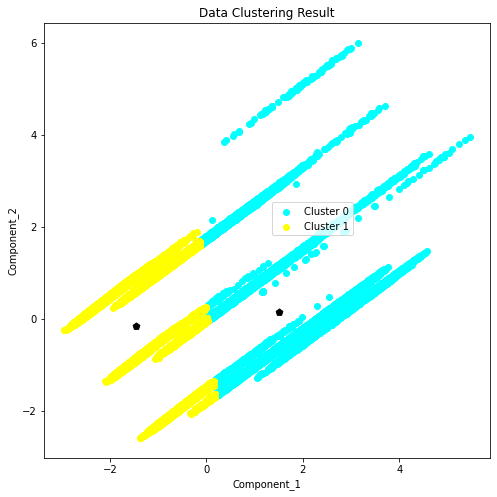

Centroid Cluster 3=
{0: array([-1.76772045,  0.60901783]), 1: array([-0.30676106, -1.34191171]), 2: array([1.70847163, 0.36274101])}



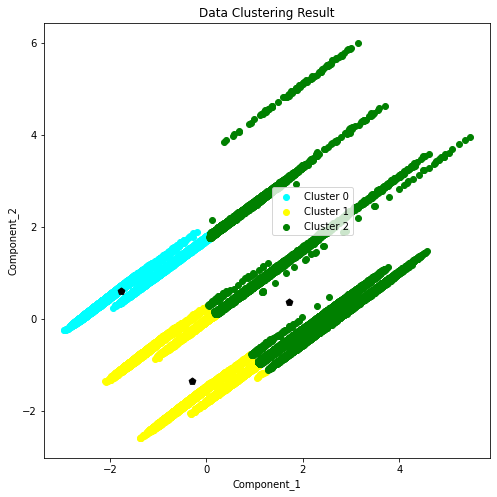

Centroid Cluster 4=
{0: array([-1.90829434,  0.23948069]), 1: array([ 2.04540248, -0.24537849]), 2: array([-0.02435847, -1.53261905]), 3: array([0.50342394, 1.65202447])}



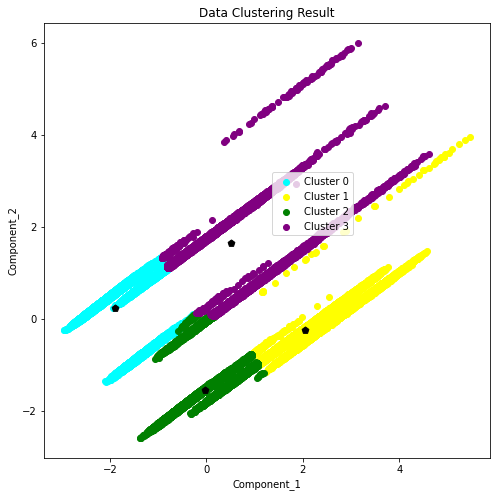

Centroid Cluster 5=
{0: array([2.4484925 , 0.16923264]), 1: array([ 1.09611105, -0.74064037]), 2: array([-1.91280323,  0.23491362]), 3: array([0.3695916 , 1.77601636]), 4: array([-0.46410543, -1.84960267])}



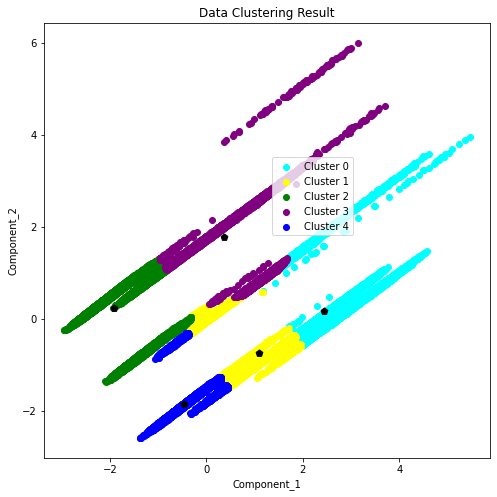

Centroid Cluster 6=
{0: array([-0.45770004, -1.88225348]), 1: array([0.37706287, 1.76754206]), 2: array([2.46348696, 0.1815264 ]), 3: array([ 1.15506302, -0.75765532]), 4: array([-2.03039311,  0.44662876]), 5: array([-1.201892  , -0.69938478])}



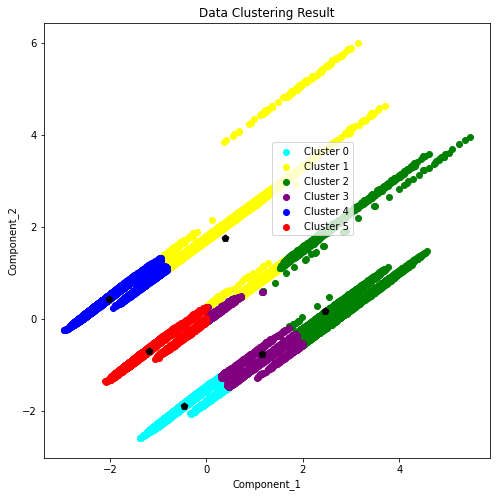

Centroid Cluster 7=
{0: array([ 0.97073447, -1.02196595]), 1: array([0.78741077, 0.59322011]), 2: array([-2.03356489,  0.44477257]), 3: array([ 1.96902339, -0.29130153]), 4: array([2.8868341 , 0.52272058]), 5: array([-0.808623  , -1.48785365]), 6: array([0.2282982 , 1.93886611])}



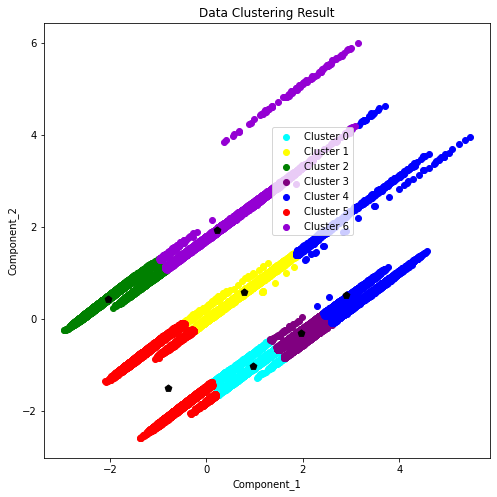

In [7]:
# inisiasi array dari hasil wcss untuk elbow method
jumlah_elbow = []
# Merubah DataFrame Menjadi Numpy Array
data = df_train.to_numpy()

max_iterasion = 100
k = range(2,8)
for i in k:
    # Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
    centroid, cluster,wcss = kmeans(i, data, max_iterasion)
    print(f'Centroid Cluster {i}=\n{centroid}\n')
    #memasukan nilai wcss sebelumnya kedalam array
    jumlah_elbow.append(wcss) 
    # Convert to dataframe
    df = []
    for key in cluster.keys():
        for c in cluster.get(key):
            df.append((c[0], c[1], key))
    df = pd.DataFrame(df)
    df.columns = ['Component_1','Component_2','Cluster']
    #visualisasi data yang dugasukjab
    plt.figure(figsize=(8,8))
    color = ['Cyan','Yellow','Green','Purple','Blue','Red','darkviolet','turquoise','darkorange','lightgreen']
    plt.title('Data Clustering Result')
    for j in range(i):
        #visalisasi cluster component_1 dan component_2
        plt.scatter(
            df['Component_1'][df['Cluster']==j],
            df['Component_2'][df['Cluster']==j],
            c=color[j],label=f'Cluster {j}'
        )
        #Memvisualisasikan letak centroid
        plt.scatter(centroid[j][0], centroid[j][1], color='k', marker='p',s=50)
    plt.legend(loc = 'best',bbox_to_anchor=(0.5, 0.5))
    plt.xlabel("Component_1")
    plt.ylabel("Component_2")
    plt.show()
    

## **IMPLEMENTASI ELBOW METHOD**

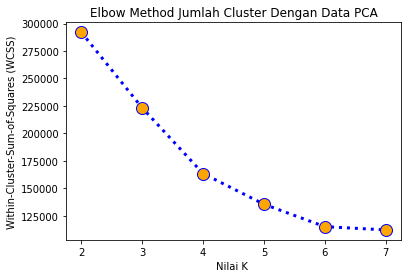

In [8]:
number_clusters = range(2,8)
plt.plot(number_clusters,jumlah_elbow,color='blue', linewidth=3,linestyle='dotted', marker='o', markersize=12, markerfacecolor='orange')
plt.title('Elbow Method Jumlah Cluster Dengan Data PCA')
plt.xlabel('Nilai K ')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()

In [9]:
for i in range(2,8):
    print(f'K = {i}, WCSS = {jumlah_elbow[i-2]}')

K = 2, WCSS = 292074.14493204677
K = 3, WCSS = 223241.80845604386
K = 4, WCSS = 163403.80440347194
K = 5, WCSS = 135429.9109077085
K = 6, WCSS = 115006.92172748066
K = 7, WCSS = 112018.15415745322


## **IMPLEMENTASI ELBOW METHOD DENGAN MENGGUNAKAN LIBRARY KMEANS**

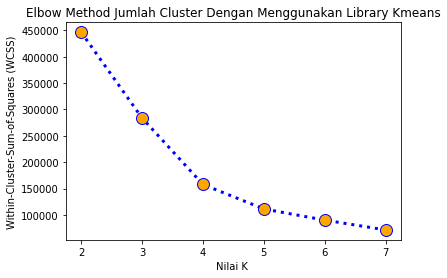

In [10]:

distance = []
K = range(2,8)
for i in K:
    km = KMeans(n_clusters=i)
    km = km.fit(df_train)
    distance.append(km.inertia_)

plt.plot(K, distance, color='blue', linewidth=3,linestyle='dotted', marker='o', markersize=12, markerfacecolor='orange')
plt.title('Elbow Method Jumlah Cluster Dengan Menggunakan Library Kmeans')
plt.xlabel('Nilai K ')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()

In [17]:
for i in range(2,8):
    print(f'K = {i}, WCSS = {distance[i-2]}')

K = 2, WCSS = 446289.7875253065
K = 3, WCSS = 283840.1175971618
K = 4, WCSS = 157816.20939494699
K = 5, WCSS = 111352.44359211033
K = 6, WCSS = 90198.9011687659
K = 7, WCSS = 71601.0667912781


In [11]:
# Merubah DataFrame Menjadi Numpy Array
data = df_train.to_numpy()

max_iterasion = 100
k = 4
# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster,wcss = kmeans(k, data, max_iterasion)
print(f'Centroid Cluster {k}=\n{centroid}\n')
#memasukan nilai wcss sebelumnya kedalam array

Centroid Cluster 4=
{0: array([-2.02197402,  0.45145874]), 1: array([ 1.93887403, -0.32407987]), 2: array([-0.50015488, -1.39509212]), 3: array([0.51407082, 1.65932452])}



In [12]:
# Convert to dataframe
df_akhir = []
for key in cluster.keys():
    for c in cluster.get(key):
        df_akhir.append((c[0], c[1], key))
df_akhir = pd.DataFrame(df_akhir)
df_akhir.columns = ['Component_1','Component_2','Cluster']
df_akhir

,Component_1,Component_2,Cluster
0,-2.184836,0.329283,0
1,-2.089879,0.416098,0
2,-2.287977,0.263063,0
3,-2.160588,0.376833,0
4,-2.578516,0.041946,0
...,...,...,...
230562,2.383044,1.831800,3
230563,-0.616799,1.275677,3
230564,-0.646476,1.256329,3
230565,-0.457871,1.398295,3


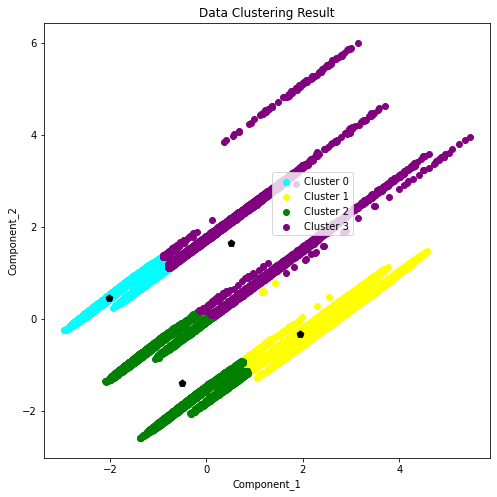

In [13]:
#visualisasi data yang dugasukjab
plt.figure(figsize=(8,8))
color = ['Cyan','Yellow','Green','Purple','Blue','Red','darkviolet','turquoise','darkorange','lightgreen']
plt.title('Data Clustering Result')
for j in range(k):
    #visalisasi cluster component_1 dan component_2
    plt.scatter(
        df_akhir['Component_1'][df_akhir['Cluster']==j],
        df_akhir['Component_2'][df_akhir['Cluster']==j],
        c=color[j],label=f'Cluster {j}'
    )
    #Memvisualisasikan letak centroid
    plt.scatter(centroid[j][0], centroid[j][1], color='k', marker='p',s=50)
plt.legend(loc = 'best',bbox_to_anchor=(0.5, 0.5))
plt.xlabel("Component_1")
plt.ylabel("Component_2")
plt.show()

In [14]:
df_akhir.to_csv('Hasil/kendaraan_train_hasil_cluster_PCA.csv', index=False)

In [15]:
df_akhir.to_excel('Hasil/kendaraan_train_hasil_cluster_PCA.xlsx', index=False)